In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

def normalizedata(X_train):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    return X_train

def model1(trdata,tract,tsdata):
    model = DecisionTreeClassifier().fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

def model2(trdata,tract,tsdata):
    model = DecisionTreeClassifier(criterion='entropy').fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

def modeln1(trdata,tract,tsdata):
    model = MultinomialNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred
def modeln2(trdata,tract,tsdata):
    model = BernoulliNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred
def modeln3(trdata,tract,tsdata):
    model = GaussianNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    return pred

In [2]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(10)

In [3]:
for i in range(1,57):
    print(i)
    fname='C:/users/rohan/notebook/dm/'+str(i)+'.csv'
    data=np.genfromtxt(fname,delimiter=',')
    data[:,0:-1]=normalizedata(data[:,0:-1])
    in1=np.where(data[:,-1]>0)
    data[in1[0],-1]=1
    predvalue=np.zeros((np.shape(data)[0],6))
    for train_index, test_index in kf.split(data):
        trdata=data[train_index,0:-1]
        tsdata=data[test_index,0:-1]
        tract=data[train_index,-1]
        tsact=data[test_index,-1]
        predvalue[test_index,0]=model1(trdata,tract,tsdata)
        predvalue[test_index,1]=model2(trdata,tract,tsdata)
        predvalue[test_index,2]=modeln1(trdata,tract,tsdata)
        predvalue[test_index,3]=modeln3(trdata,tract,tsdata)
        predvalue[test_index,4]=modeln3(trdata,tract,tsdata)
        predvalue[test_index,5]=tsact
    fname='C:/users/rohan/notebook/ass2csv/'+str(i)+'one.csv'    
    np.savetxt(fname,predvalue, delimiter=',', fmt='%f') 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [4]:
from sklearn.metrics import (
    f1_score, precision_score, recall_score,accuracy_score
    )
fileloc='C:/users/rohan/notebook/ass2csv/'
fval=np.zeros((56,5))
acv=np.zeros((56,5))
for i in range(0,56):
    fname= fileloc+str(i+1)+'one.csv'
    data1=np.genfromtxt(fname,delimiter=',')
    y1=data1[:,-1]
    for j in range(0,5):
         fval[i,j]=f1_score(y1, data1[:,j])
         acv[i,j]=accuracy_score(y1, data1[:,j])   
fname=fileloc+'acc.csv'    
np.savetxt(fname,acv, delimiter=',', fmt='%f')      
fname=fileloc+'fmea.csv'    
np.savetxt(fname,fval, delimiter=',', fmt='%f')  

In [5]:
def nos(c,in1):
    in2=np.where(c[in1[0]]==0)
    in3=np.where(c[in1[0]]>0)
    return len(in2[0]),len(in3[0])

def giniscal(f,c):
    mf=np.median(f)
    in1=np.where(f<=mf)
    in2=np.where(f>mf)
    n00,n01=nos(c,in1)
    n10,n11=nos(c,in2)
    if (n00==0 or n01==0):
        p00=0.5
        p01=0.5
    else:
        p00=n00/(n00+n01)
        p01=n01/(n00+n01)
    if(n10==0 or n11==0):
        p10=0.5
        p11=0.5
    else:
        p10=n10/(n10+n11)
        p11=n11/(n10+n11)
    gl=1-p00*p00-p01*p01;
    gr=1-p10*p10-p11*p11;
    fgs=len(in1[0])/(len(in1[0])+len(in2[0]))*gl+len(in2[0])/(len(in1[0])+len(in2[0]))*gr
    return fgs

In [2]:
import numpy as np
gsv=np.zeros((56,20))
fileloc='C:/users/rohan/notebook/ass2csv/'
for i in range(1,2):
    print(i)
    fname='C:/users/rohan/notebook/dm/'+str(i)+'.csv'
    data=np.genfromtxt(fname,delimiter=',')
    for j in range(0,20):
        print(data[:,j]);
#         gsv[i-1,j]=giniscal(data[:,j],data[:,-1])
# fname=fileloc+'gini.csv'    
# np.savetxt(fname,gsv, delimiter=',', fmt='%f')   

1
[11. 14.  3. 12.  6.  5.  4. 16.  4. 17.  9.  3. 10. 17.  5. 10. 22.  5.
  4.  4.  9.  8. 22.  2.  7.  2. 23. 12.  3.  4.  3.  0.  9.  7. 16. 13.
 14.  6.  9.  5.  3. 27. 10. 24.  6. 14.  5.  2.  2.  5.  5. 12.  2. 17.
  1. 18. 23. 42.  5.  3.  7.  3. 11.  5.  4.  9. 11.  4.  5.  8. 13.  8.
  6.  4.  8. 21.  6.  5. 71.  4.  8.  3.  9. 17.  0. 31. 21.  3. 15. 13.
 10.  8.  6.  8.  2.  8. 19.  5. 22. 19. 19.  5. 21.  5.  4.  8.  3. 11.
  3.  4.  2. 14.  6. 14. 19.  3. 19.  7.  4.  8. 65. 14. 14.  4. 27.]
[4. 1. 2. 3. 3. 1. 4. 3. 5. 3. 3. 3. 3. 2. 1. 1. 4. 1. 1. 1. 1. 3. 4. 1.
 2. 1. 1. 1. 3. 1. 1. 1. 6. 3. 3. 3. 1. 3. 5. 3. 1. 3. 3. 3. 2. 3. 4. 1.
 2. 1. 1. 3. 2. 1. 2. 4. 3. 4. 1. 3. 1. 1. 3. 1. 3. 1. 2. 2. 1. 4. 4. 3.
 1. 1. 4. 1. 5. 3. 1. 3. 1. 1. 5. 3. 1. 1. 1. 1. 3. 1. 1. 1. 3. 3. 2. 3.
 3. 1. 3. 1. 4. 4. 1. 1. 3. 3. 1. 1. 1. 1. 1. 3. 3. 5. 1. 2. 1. 4. 3. 4.
 3. 4. 1. 2. 1.]
[ 2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  0.  0.  0.
  0.  0.  4.  0.  1.  0.  1.  0.  1

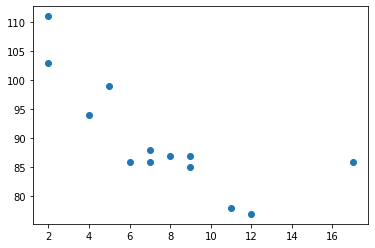

In [1]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()
    
    

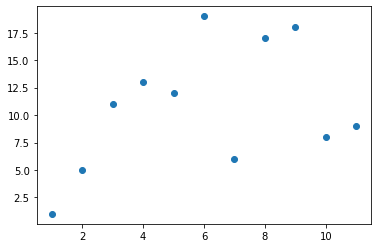

In [4]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6,7,8,9,10,11]
y=[1,5,11,13,12,19,6,17,18,8,9]
plt.scatter(x,y)
plt.show()

In [ ]:
import numpy as np
graphval=np.zeros((56,20))
fileloc='C:/users/rohan/notebook/ass2csv/'
for i in range(1,56):
    print(i)
    fname='C:/users/rohan/notebook/dm/'+str(i)+'.csv'
    data=np.genfromtxt(fname,delimiter=',')
    for j in range(0,20):
        print(data[:,j]);
        
# fname=fileloc+'gini.csv'    
# np.savetxt(fname,gsv, delimiter=',', fmt='%f')   